In [9]:
import json
import argparse
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [43]:
lang = "en-cs"
trainer_state_path = f"./mbart-wmt14-{lang}/trainer_state.json"
save_path = f"./pic/{lang}/"
os.makedirs(save_path, exist_ok=True)

with open(trainer_state_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

In [44]:
log = data.get('log_history', [])

In [45]:
train_losses = []
train_grad_norms = []
train_learning_rates = []
eval_bleus = []
eval_losses = []
eval_gen_lens = []
for entry in log:
    if 'loss' in entry:
        train_losses.append((entry['step'], entry['loss']))
    if 'grad_norm' in entry:
        train_grad_norms.append((entry['step'], entry['grad_norm']))
    if 'learning_rate' in entry:
        train_learning_rates.append((entry['step'], entry['learning_rate']))
    if 'eval_bleu' in entry:
        eval_bleus.append((entry['step'], entry['eval_bleu']))
    if 'eval_loss' in entry:
        eval_losses.append((entry['step'], entry['eval_loss']))
    if 'eval_gen_len' in entry:
        eval_gen_lens.append((entry['step'], entry['eval_gen_len']))



In [46]:
def tuples_to_xy(tuples):
    if not tuples:
        return np.array([]), np.array([])
    arr = np.array(tuples, dtype=float)
    # some entries might be (step, value) but step could be missing; handle shape
    if arr.ndim == 1 or arr.shape[1] < 2:
        return np.array([]), np.array([])
    # sort by step
    idx = np.argsort(arr[:,0])
    x = arr[idx,0]
    y = arr[idx,1]
    return x, y

def plot_metric(x, y, title, xlabel, ylabel):
    plt.figure()
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    fileName = title+".png"
    plt.savefig(os.path.join(save_path, fileName), dpi=400, bbox_inches="tight")

    plt.show()
    plt.close()

In [47]:
# plot_metric(*tuples_to_xy(train_losses), "Training Loss", "Steps", "Loss")
# plot_metric(*tuples_to_xy(train_grad_norms), "Training Gradient Norm", "Steps", "Gradient Norm")
# plot_metric(*tuples_to_xy(train_learning_rates), "Training Learning Rate", "Steps", "Learning Rate")
# plot_metric(*tuples_to_xy(eval_bleus), "Evaluation BLEU", "Steps", "BLEU")
# plot_metric(*tuples_to_xy(eval_losses), "Evaluation Loss", "Steps", "Loss")
# plot_metric(*tuples_to_xy(eval_gen_lens), "Evaluation Generation Length", "Steps", "Generation Length")

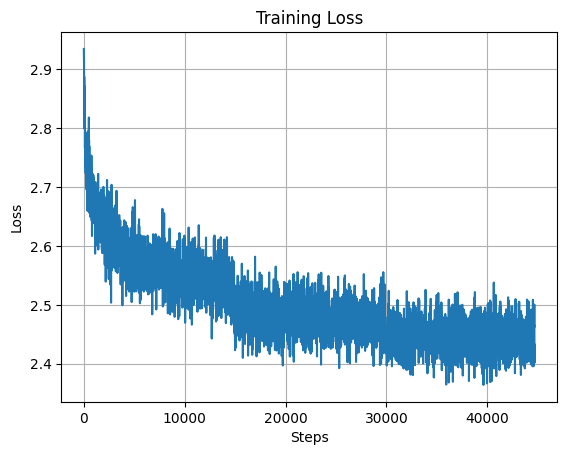

In [48]:
plot_metric(*tuples_to_xy(train_losses), "Training Loss", "Steps", "Loss")

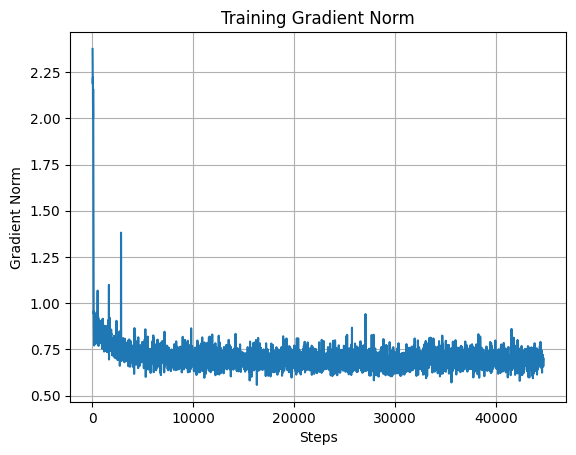

In [49]:
plot_metric(*tuples_to_xy(train_grad_norms), "Training Gradient Norm", "Steps", "Gradient Norm")

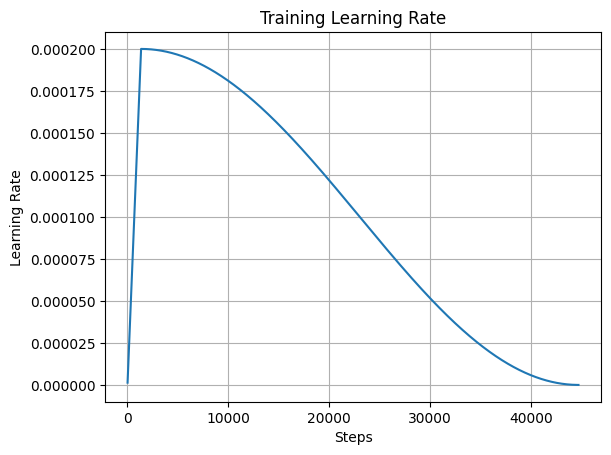

In [50]:
plot_metric(*tuples_to_xy(train_learning_rates), "Training Learning Rate", "Steps", "Learning Rate")


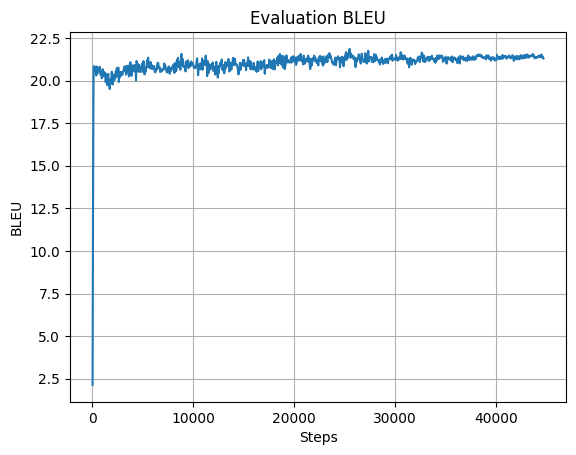

In [51]:
plot_metric(*tuples_to_xy(eval_bleus), "Evaluation BLEU", "Steps", "BLEU")


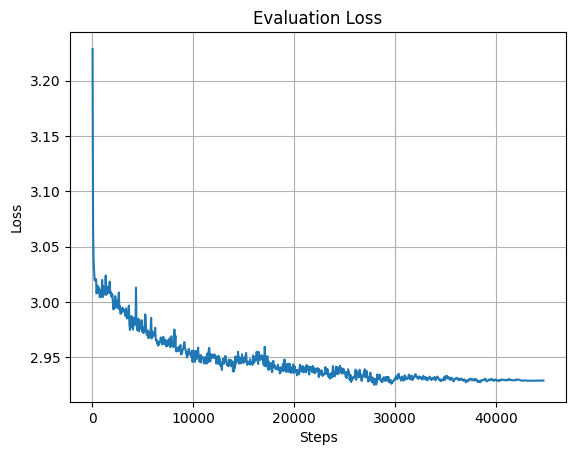

In [52]:
plot_metric(*tuples_to_xy(eval_losses), "Evaluation Loss", "Steps", "Loss")


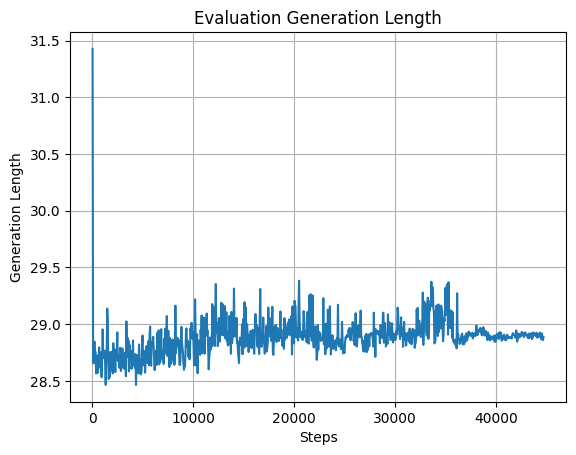

In [53]:
plot_metric(*tuples_to_xy(eval_gen_lens), "Evaluation Generation Length", "Steps", "Generation Length")